Fake news detection

In [483]:
#!pip install pandas

In [484]:
#!pip install matplotlib

In [485]:
import pandas as pd
import numpy as np
import matplotlib
import itertools
df = pd.read_csv("news.csv")
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [486]:
df.shape

(6335, 4)

In [487]:
labels =df.label

In [488]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [489]:
#!pip install scikit-learn

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [491]:
x_train, x_test , y_train, y_test = train_test_split(df["text"],labels,test_size = 0.4,random_state = 20)

In [492]:
x_train.head()

1963    0 Add Comment \nA NEGLECTED wooden pallet is s...
333     Iraq’s Skies Darken as Islamic State Torches O...
5411    THIS IS COMEY’S LAST CHANCE FOR REDEMPTION THI...
2327    He has been roundly condemned for these statem...
3030    A Twitter page known as Black Women for Trump ...
Name: text, dtype: object

In [493]:
#!pip install TfidVectorizer

In [494]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [495]:
vector = TfidfVectorizer(stop_words='english',max_df=0.7)

In [496]:
#fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [497]:
#initilise a passiveAggressiveclassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [498]:
# prediction the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
y_pred = pac.predict(tf_test)

In [499]:
score = accuracy_score(y_test, y_pred)

In [500]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.08%


In [501]:
#confusion metrics
cm=confusion_matrix(y_test,y_pred ,labels= ['FAKE' ,'REAL'])
print(cm)

[[1226   67]
 [  83 1158]]


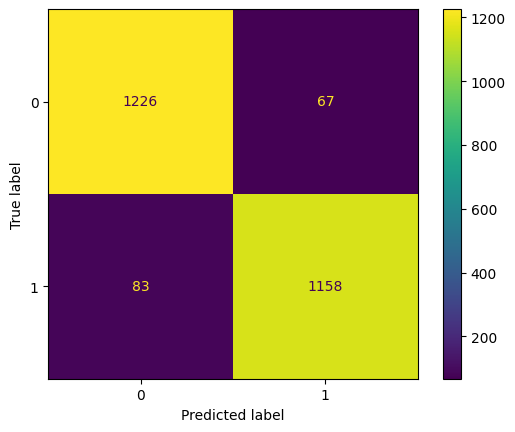

In [502]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix =cm)
cm_disp.plot()

In [503]:
print(f"Classification Report : \n\n{classification_report(y_test,y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94      1293
        REAL       0.95      0.93      0.94      1241

    accuracy                           0.94      2534
   macro avg       0.94      0.94      0.94      2534
weighted avg       0.94      0.94      0.94      2534



In [504]:
#save model
import pickle
filename ='finalized_model.pkl'
pickle.dump(pac,open(filename,'wb'))

In [505]:
#save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector ,open(filename,'wb'))